## Importing packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from wrangle import acquire, prepare, split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Acquiring data from local file

In [3]:
credit = acquire()

## Preparing the data

In [4]:
credit = prepare(credit)

## Splitting the data

In [5]:
train, validate, test = split(credit)

## Exploration

In [6]:
train

,churn,age,gender,dependents,education,marital_status,income,card_type,tenure,products_used,inactive_months_past_year,contacted_past_year,credit_limit,revolving_bal_tot,avg_open_to_buy,trans_amt_chng_q4_q1,tot_trans_amt,total_trans_ct,ct_chng_q4_q1,avg_card_utilization_ratio
7897,1,40,F,3,Doctorate,Married,Less than $40K,Blue,21,5,2,2,1728.0,0,1728.0,0.410,2191,38,0.357,0.000
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2304,0,41,M,3,Post-Graduate,Married,$60K - $80K,Blue,34,4,2,2,2624.0,1319,1305.0,0.768,4189,74,0.609,0.503
3192,0,39,M,2,Uneducated,Single,$40K - $60K,Blue,25,4,1,3,9121.0,1426,7695.0,0.666,4112,80,0.481,0.156
8491,0,49,F,3,Graduate,Single,$40K - $60K,Blue,32,1,3,3,5400.0,1426,3974.0,0.595,4643,80,0.702,0.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,0,56,M,2,Graduate,Single,$120K +,Blue,45,2,2,3,11714.0,898,10816.0,0.726,13956,122,0.718,0.077
3225,0,42,M,3,Post-Graduate,Married,$40K - $60K,Blue,29,3,3,4,2533.0,1126,1407.0,0.788,3436,74,0.574,0.445
5570,0,43,F,3,Graduate,Single,$40K - $60K,Blue,36,5,2,4,2594.0,1686,908.0,0.624,4503,67,0.811,0.650
8441,0,47,F,4,Graduate,Single,Less than $40K,Blue,34,1,3,2,5756.0,860,4896.0,0.708,5298,72,0.714,0.149


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 7897 to 9853
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5670 non-null   int64  
 1   age                         5670 non-null   int64  
 2   gender                      5670 non-null   object 
 3   dependents                  5670 non-null   int64  
 4   education                   5670 non-null   object 
 5   marital_status              5670 non-null   object 
 6   income                      5670 non-null   object 
 7   card_type                   5670 non-null   object 
 8   tenure                      5670 non-null   int64  
 9   products_used               5670 non-null   int64  
 10  inactive_months_past_year   5670 non-null   int64  
 11  contacted_past_year         5670 non-null   int64  
 12  credit_limit                5670 non-null   float64
 13  revolving_bal_tot           56

<AxesSubplot:>

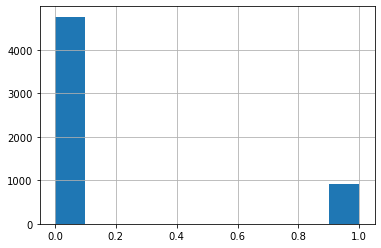

In [5]:
train.churn.hist()

<AxesSubplot:>

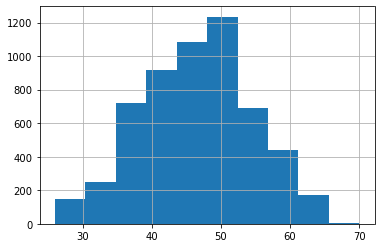

In [6]:
train.age.hist()

<AxesSubplot:>

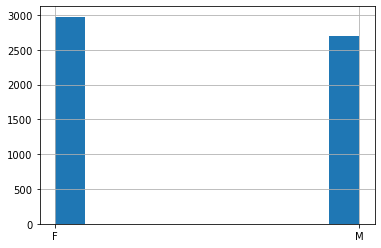

In [7]:
train.gender.hist()

<AxesSubplot:>

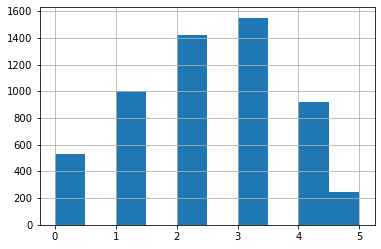

In [8]:
train.dependents.hist()

<AxesSubplot:>

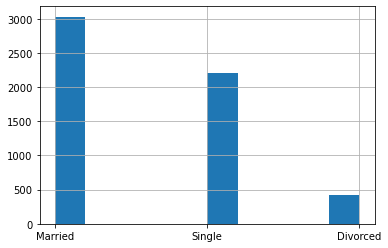

In [13]:
train.marital_status.hist()

In [10]:
data_dictionary = pd.DataFrame(index = credit.columns, columns=['type', 'description'])
for name in credit.columns:
    data_dictionary.loc[name,'type'] = 'int64'
data_dictionary.loc[['credit_limit', 'avg_open_to_buy', 'trans_amt_chng_q4_q1', 'ct_chng_q4_q1',
                     'avg_card_utilization_ratio'], 'type'] = 'float64'
data_dictionary.loc[['gender', 'education', 'marital_status', 'income', 'card_type'], 'type'] = 'object'

In [12]:
data_dictionary.index.tolist()

['churn',
 'age',
 'gender',
 'dependents',
 'education',
 'marital_status',
 'income',
 'card_type',
 'tenure',
 'products_used',
 'inactive_months_past_year',
 'contacted_past_year',
 'credit_limit',
 'revolving_bal_tot',
 'avg_open_to_buy',
 'trans_amt_chng_q4_q1',
 'tot_trans_amt',
 'total_trans_ct',
 'ct_chng_q4_q1',
 'avg_card_utilization_ratio']

In [16]:
data_dictionary.loc[['churn'], 'description'] = 'Whether the customer is with the bank or not, 1 indicating that they have churned'
data_dictionary.loc[['age'], 'description'] = 'The customer\'s age'
data_dictionary.loc[['gender'], 'description'] = 'The customer\'s gender'
data_dictionary.loc[['dependents'], 'description'] = 'How many dependents the customer has'
data_dictionary.loc[['education'], 'description'] = 'The customer\'s highest level of education'
data_dictionary.loc[['marital_status'], 'description'] = 'The customer\'s marital status'
data_dictionary.loc[['income'], 'description'] = 'The customer\'s income arranged into bins'
data_dictionary.loc[['card_type'], 'description'] = 'The type of credit card the customer has'
data_dictionary.loc[['tenure'], 'description'] = 'The number of months the customer has been with the bank'
data_dictionary.loc[['products_used'], 'description'] = 'Total number of products held by the customer'
data_dictionary.loc[['inactive_months_past_year'], 'description'] = 'The number of months the customer has been inactive in the last year'
data_dictionary.loc[['contacted_past_year'], 'description'] = 'Number of contacts in the last year'
data_dictionary.loc[['credit_limit'], 'description'] = 'The customers credit limit'
data_dictionary.loc[['revolving_bal_tot'], 'description'] = 'Total revolving balance on the credit card'
data_dictionary.loc[['avg_open_to_buy'], 'description'] = 'Open to buy credit line (Average of last 12 months)'
data_dictionary.loc[['trans_amt_chng_q4_q1'], 'description'] = 'Change in transaction amount (Q4 over Q1)'
data_dictionary.loc[['tot_trans_amt'], 'description'] = 'Total transaction amount (last 12 months)'
data_dictionary.loc[['total_trans_ct'], 'description'] = 'Total transaction count (last 12 months)'
data_dictionary.loc[['ct_chng_q4_q1'], 'description'] = 'Change in transaction count (Q4 over Q1)'
data_dictionary.loc[['avg_card_utilization_ratio'], 'description'] = 'Average card utilization ratio'

In [18]:
print(data_dictionary.to_markdown())

|                            | type    | description                                                                       |
|:---------------------------|:--------|:----------------------------------------------------------------------------------|
| churn                      | int64   | Whether the customer is with the bank or not, 1 indicating that they have churned |
| age                        | int64   | The customer's age                                                                |
| gender                     | object  | The customer's gender                                                             |
| dependents                 | int64   | How many dependents the customer has                                              |
| education                  | object  | The customer's highest level of education                                         |
| marital_status             | object  | The customer's marital status                                                     |
